# Pivotal vs Percentile
In this notebook we will explore the difference between the pivotal and percentile bootstrapping methods.
tldr -

* The percentile method generates a bunch of re-samples and esimates confidence intervals based on the percentile values of those re-samples.
* The pivotal method is similar to percentile but does a correction for the fact that your input sample may not be a good representation of your population. Bootstrapped uses this as the default.


We will show that the pviotal method has generally better power. This does come at a cost - the pivotal method can warp the confidence interval to give non-sencical interval values.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import numpy.random as npr

In [3]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.power as bs_power

## Setup

The bootstrap is based on a sample of your larger population. A sample is only as good as how representitave it is. If you happen to be unlucky in your sample then you are going to make some very bad inferences!


We pick the exponential distribution because it should differentiate the difference between the two methods somewhat. We will also look at an extreme case.

### pivotal CI
* pick a pivot e.g. $\hat{\theta}$
* calculate p-val under t-distribution

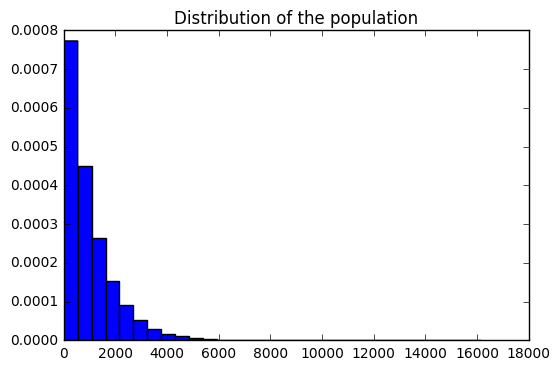

In [4]:
population = np.random.exponential(scale=1000, size=500000)

# Plot the population
count, bins, ignored = plt.hist(population, 30, normed=True)

plt.title('Distribution of the population')

In [5]:
population = pd.Series(population)


In [6]:
# Do a bunch of simpulations and track the percent of the time the error bars overlap the true mean
def bootstrap_vs_pop_mean(population, num_samples, is_pivotal, num_loops=3000):
    population_mean = population.mean()
    pop_results = []

    for _ in range(num_loops):
        samples = population.sample(num_samples)
        result = bs.bootstrap(samples.values, stat_func=bs_stats.mean, is_pivotal=is_pivotal)

        # we want to 0 center this for our power plotting below
        # we want our error bars to overlap zero
        result = result - population_mean

        pop_results.append(result)
    return pop_results

In [7]:
def bounds_squared_distance(results):
    '''The squared distance from zero for both the lower and the upper bound
    This is a rough measure of how 'good' the confidence intervals are in terms of near misses vs extreme misses.
    
    It is minimized when (1) the confidence interval is symmetric over zero and (2) when it is narrow.
    '''
    return np.sum([r.upper_bound**2 for r in results]) + np.sum([r.lower_bound**2 for r in results])

def squared_dist_ratio(x, y):
    'Compare bounds_squared_distance for two sets of bootstrap results'
    return bounds_squared_distance(x) / bounds_squared_distance(y)

## Pivotal vs Percentile for very small input sample size - 10 elements

In [ ]:
pivotal_tiny_sample_count = bootstrap_vs_pop_mean(population, num_samples=10, is_pivotal=True)
percentile_tiny_sample_count = bootstrap_vs_pop_mean(population, num_samples=10, is_pivotal=False)

In [ ]:
squared_dist_ratio(pivotal_tiny_sample_count, percentile_tiny_sample_count)